<a href="https://colab.research.google.com/github/EvidenceN/Computer-Vision-TensorFlow/blob/master/Computer_Vision_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(tf.__version__)

1.15.0


In [0]:
# fashion mnist dataset is a 28x28 array of greyscale images. 
# the image labels are numbers. we use numbers as labels to avoid bias. 
# avoiding bias in machine learning: https://developers.google.com/machine-learning/fairness-overview/
# clothing data set has 10 categories/10 classes. 

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


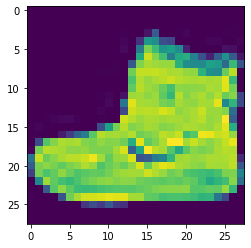

In [0]:
plt.imshow(train_images[0])

In [0]:
print(train_labels[0])

# The data for a particular image is a grid of values from
# zero to 255 with pixel Grayscale values.

print(train_images[0])



You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:


In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

In [0]:
# Sequential with 3 layers instead of 1 layer like previous lesson. 
# Flatten takes the 28 X 28 square and turn it into a simple linear array
# hidden layer takes the 784 values of an angle boot and turn it into the value 9
# see hiden layer image https://drive.google.com/file/d/1pUiscWVrUs9UHHn8nnGVpk1ZSNbcQXT9/view?usp=sharing
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # shape we should expect the data to be in. 
    keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer. # 128 neurons. # variables in a function, x1, x2, x3, e.t.c
    keras.layers.Dense(10, activation=tf.nn.softmax) #10 neurons because of 10 classes of clothin in the dataset.
])

# input layer in the shape of the data
# output layer in the shape of the classes
# and a hidden layer to define the relationship between input and output layer. 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling *model.fit * asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like.


In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5006 - acc: 0.8244
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3778 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3404 - acc: 0.8768
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3161 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2969 - acc: 0.8894


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:


In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.3807 - acc: 0.8591


[0.38073816514015196, 0.8591]

It shows an accuracy of 86%

# Exploration Exercises

It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output is a list of numbers.

**Excercise 1**

In [0]:
classifications = model.predict(test_images)
print(classifications[11])

[3.2419046e-06 1.9486668e-05 1.0543654e-05 5.1685670e-06 9.2126007e-05
 9.9832612e-01 4.1944659e-05 5.6005927e-04 7.5231721e-05 8.6616335e-04]


In [0]:
print(test_labels[11])

5


The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value, i.e. the first value in the list is the probability that the handwriting is of a '0', the next is a '1' etc. Notice that they are all VERY LOW probabilities.

For the 7, the probability was .999+, i.e. the neural network is telling us that it's almost certainly a 7.

**The 5th element on the list is the biggest, and ITEM 11 is labelled 5**

**Exercise 2. Experimenting with different values for the dense layer.**

In [0]:
import tensorflow as tf
from tensorflow import keras

# getting the dataset
mnist = tf.keras.datasets.mnist

# loading the dataset into different variables
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

# standardizing the dataset to have 0's and 1's
# training and testing images has numbers between 0 and 255
training_images = training_images/255.0
testing_images = testing_images/255.0

# designing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# building the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
             metrics=['accuracy'])

# fitting the training data to the training labels
model.fit(training_images, training_labels, epochs = 5)

# evaluating the accuracy of the model using testing data to see how well our
# system was trained. 
model.evaluate(testing_images, testing_labels)

# creating a classification for each of the test images. 
# The classification let's us know the probability of 
# which label the test image belongs to. is it a shoe, shirt, 
# but in this case, the classification is not shoe, shirt, e.t.c
# but rather it is a number. 
# We are testing to see if our model can 
# classify the images into the appropriate categories/labels

classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 226us/sample - loss: 0.1842 - acc: 0.9448
Epoch 2/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0732 - acc: 0.9771
Epoch 3/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0492 - acc: 0.9843
Epoch 4/5
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0355 - acc: 0.9883
Epoch 5/5
10000/10000 [==============================] - 1s 94us/sample - loss: 0.0709 - acc: 0.9801
[4.4031156e-09 1.1802603e-08 3.7656264e-08 1.8585199e-06 3.8147692e-12
 3.0099482e-08 2.0999068e-13 9.9999619e-01 4.1933403e-09 1.8500493e-06]
7


In [0]:
# training with more epochs generates greater accuracy. 

import tensorflow as tf
from tensorflow import keras

# getting the dataset
mnist = tf.keras.datasets.mnist

# loading the dataset into different variables
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

# standardizing the dataset to have 0's and 1's
# training and testing images has numbers between 0 and 255
training_images = training_images/255.0
testing_images = testing_images/255.0

# designing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# building the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
             metrics=['accuracy'])

# fitting the training data to the training labels
model.fit(training_images, training_labels, epochs = 15)

# evaluating the accuracy of the model using testing data to see how well our
# system was trained. 
model.evaluate(testing_images, testing_labels)

# creating a classification for each of the test images. 
# The classification let's us know the probability of 
# which label the test image belongs to. is it a shoe, shirt, 
# but in this case, the classification is not shoe, shirt, e.t.c
# but rather it is a number. 
# We are testing to see if our model can 
# classify the images into the appropriate categories/labels

classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])



Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1861 - acc: 0.9432
Epoch 2/15
60000/60000 [==============================] - 16s 259us/sample - loss: 0.0756 - acc: 0.9764
Epoch 3/15
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0487 - acc: 0.9848
Epoch 4/15
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0341 - acc: 0.9891
Epoch 5/15
60000/60000 [==============================] - 15s 251us/sample - loss: 0.0264 - acc: 0.9918
Epoch 6/15
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0217 - acc: 0.9933
Epoch 7/15
60000/60000 [==============================] - 17s 284us/sample - loss: 0.0166 - acc: 0.9942
Epoch 8/15
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0152 - acc: 0.9948
Epoch 9/15
60000/60000 [==============================] - 17s 278us/sample - loss: 0.0136 - acc: 0.9956
Epoch 10/15
60000/60000 [================

In [0]:
# training with too much epochs causes overfitting. because accuracy begins to 
# go down.

import tensorflow as tf
from tensorflow import keras

# getting the dataset
mnist = tf.keras.datasets.mnist

# loading the dataset into different variables
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

# standardizing the dataset to have 0's and 1's
# training and testing images has numbers between 0 and 255
training_images = training_images/255.0
testing_images = testing_images/255.0

# designing the model
# relu throws out anything that is negative. it doesn't activate anything below 0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# building the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
             metrics=['accuracy'])

# fitting the training data to the training labels
model.fit(training_images, training_labels, epochs = 30)

# evaluating the accuracy of the model using testing data to see how well our
# system was trained. 
model.evaluate(testing_images, testing_labels)

# creating a classification for each of the test images. 
# The classification let's us know the probability of 
# which label the test image belongs to. is it a shoe, shirt, 
# but in this case, the classification is not shoe, shirt, e.t.c
# but rather it is a number. 
# We are testing to see if our model can 
# classify the images into the appropriate categories/labels

classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])



Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 16s 260us/sample - loss: 0.1867 - acc: 0.9440
Epoch 2/30
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0746 - acc: 0.9768
Epoch 3/30
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0498 - acc: 0.9839
Epoch 4/30
60000/60000 [==============================] - 16s 270us/sample - loss: 0.0336 - acc: 0.9892
Epoch 5/30
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0272 - acc: 0.9911
Epoch 6/30
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0196 - acc: 0.9937
Epoch 7/30
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0184 - acc: 0.9939
Epoch 8/30
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0143 - acc: 0.9954
Epoch 9/30
60000/60000 [==============================] - 15s 257us/sample - loss: 0.0132 - acc: 0.9956
Epoch 10/30
60000/60000 [================

In [0]:
# not standardizing the dataset before training. 

import tensorflow as tf
from tensorflow import keras

# getting the dataset
mnist = tf.keras.datasets.mnist

# loading the dataset into different variables
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

# standardizing the dataset to have 0's and 1's
# training and testing images has numbers between 0 and 255
#training_images = training_images/255.0
#testing_images = testing_images/255.0

# designing the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# building the model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', 
             metrics=['accuracy'])

# fitting the training data to the training labels
model.fit(training_images, training_labels, epochs = 5)

# evaluating the accuracy of the model using testing data to see how well our
# system was trained. 
model.evaluate(testing_images, testing_labels)

# creating a classification for each of the test images. 
# The classification let's us know the probability of 
# which label the test image belongs to. is it a shoe, shirt, 
# but in this case, the classification is not shoe, shirt, e.t.c
# but rather it is a number. 
# We are testing to see if our model can 
# classify the images into the appropriate categories/labels

classifications = model.predict(testing_images)

print(classifications[0])
print(testing_labels[0])



Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.3):
      print("\nLoss is low so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

training_images = training_images/255.0
testing_images = testing_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

#model.predict(testing_images, testing_labels)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.4726 - acc: 0.8333
Epoch 2/5
60000/60000 [==============================] - 11s 180us/sample - loss: 0.3603 - acc: 0.8685
Epoch 3/5
60000/60000 [==============================] - 11s 176us/sample - loss: 0.3214 - acc: 0.8813
Epoch 4/5
60000/60000 [==============================] - 10s 170us/sample - loss: 0.3006 - acc: 0.8893
Epoch 5/5
59936/60000 [============================>.] - ETA: 0s - loss: 0.2811 - acc: 0.8950
Loss is low so cancelling training!
60000/60000 [==============================] - 11s 175us/sample - loss: 0.2810 - acc: 0.8950


**Alternative to the code above**

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.89): #this is the difference from the code above
      print("\nReached 89% accuracy so cancelling training!")
      self.model.stop_training = True
      
callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()

training_images = training_images/255.0
testing_images = testing_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

#model.predict(testing_images, testing_labels)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 272us/sample - loss: 0.4695 - acc: 0.8316
Epoch 2/10
60000/60000 [==============================] - 17s 276us/sample - loss: 0.3590 - acc: 0.8684
Epoch 3/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.3214 - acc: 0.8827
Epoch 4/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.2953 - acc: 0.8896
Epoch 5/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.2800 - acc: 0.8966
Reached 90% accuracy so cancelling training!
60000/60000 [==============================] - 16s 267us/sample - loss: 0.2800 - acc: 0.8966
